# Audio classification using convolutional neural networks

You are the leader of a group of climate scientists who are concerned about the planet's dwindling rain forests. The world loses up to 10 million acres of old-growth rain forests each year, much of it due to illegal logging. Deforestation from this and other causes accounts for about 10% of global carbon emissions. Your team plans to convert thousands of discarded smart phones into solar-powered listening devices and position them throughout the Amazon to transmit alerts in response to the sounds of chainsaws and truck engines. You need software to install on these phones that uses artificial intelligence (AI) to identify such sounds in real time. And you need it fast, because climate change won't wait.

Audio classification can be performed by converting audio streams into [spectrograms](https://en.wikipedia.org/wiki/Spectrogram), which provide visual representations of spectrums of frequencies as they vary over time, and classifying the spectrograms using [convolutional neural networks](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNNs). The spectrograms below were generated from WAV files with chainsaw sounds in the foreground and rainforest sounds in the background. Let's use Keras to build a CNN that can identify the tell-tale sounds of logging operations and distinguish them from ambient sounds such as wildlife and thunderstorms.

![](Images/spectrograms.png)

This notebook was inspired by the [Rainforest Connection](https://rfcx.org/), which uses recycled Android phones and a TensorFlow model to monitor rain forests for sounds indicative of illegal activity. For more information, see [The fight against illegal deforestation with TensorFlow](https://blog.google/technology/ai/fight-against-illegal-deforestation-tensorflow/) in the Google AI blog. It is just one example of how AI is making the world a better place.

## Generate spectrograms

The "Sounds" directory contains subdirectories named "background," "chainsaw," "engine," and "storm." Each subdirectory contains 100 WAV files. The WAV files in the "background" directory contain rainforest background noises only, while the files in the other subdirectories include the sounds of chainsaws, engines, and thunderstorms overlaid on the background noises. These WAV files were generated by using a soundscape-synthesis package named [Scaper](https://pypi.org/project/scaper/) to combine sounds in the public [UrbanSound8K](https://urbansounddataset.weebly.com/urbansound8k.html) dataset with rainforest sounds obtained from YouTube.

The first step is to load the WAV files, use a Python package named [Librosa](https://librosa.org/) to generate spectrogram images from them, load the spectrograms into memory, and prepare them for use in training a CNN. To aid in this process, we'll define a pair of helper functions for creating spectrograms from WAV files and converting all the WAV files in a specified directory into spectrograms.

In [25]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.m4a','.png',))
        create_spectrogram(input_file, output_file)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the audio data and sampling rate
audio_data = sound
sampling_rate = audio["sampling_rate"]

# Create a time axis in seconds
time_axis = np.linspace(0, len(audio_data) / sampling_rate, num=len(audio_data))

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(time_axis, audio_data)
plt.title("Waveform of the Audio Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

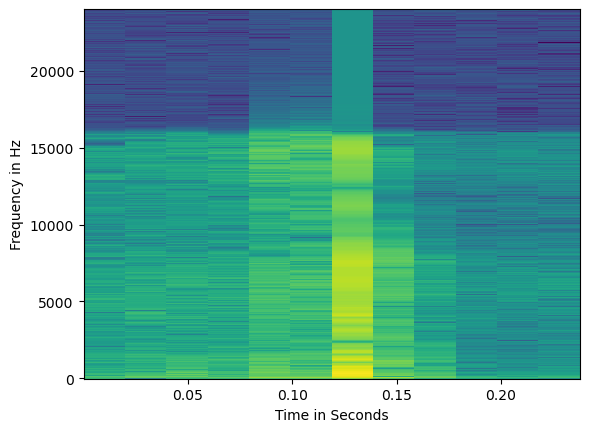

In [132]:
# Example for plotting a spectrogram using this function
import audiosegment
import matplotlib.pyplot as plt
#...
seg = audiosegment.from_file("6_1.m4a")
freqs, times, amplitudes = seg.spectrogram(window_length_s=0.02, overlap=0.01)
amplitudes = 10 * np.log10(amplitudes + 1e-9)
# Plot
plt.pcolormesh(times, freqs, amplitudes)
plt.xlabel("Time in Seconds")
plt.ylabel("Frequency in Hz")
plt.show()

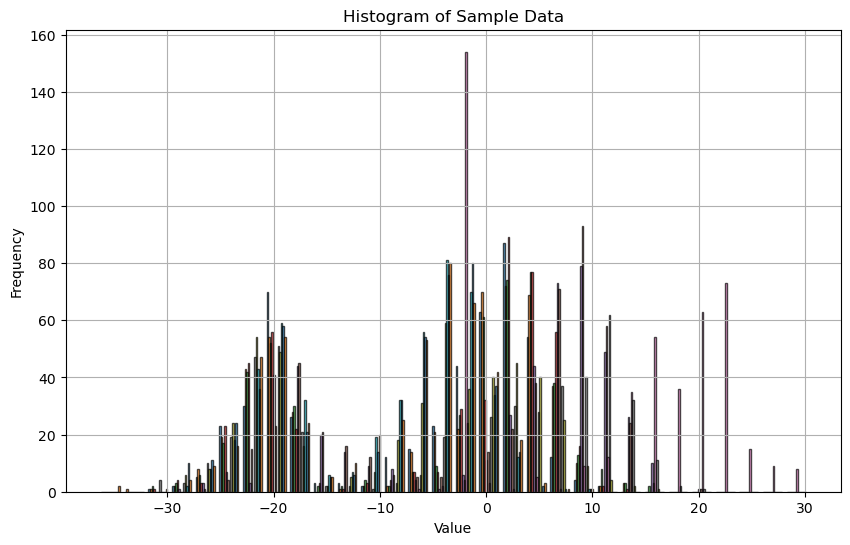

In [133]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
data = amplitudes  # 1000 random numbers from a normal distribution

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data')

# Show plot
plt.grid(True)
plt.show()


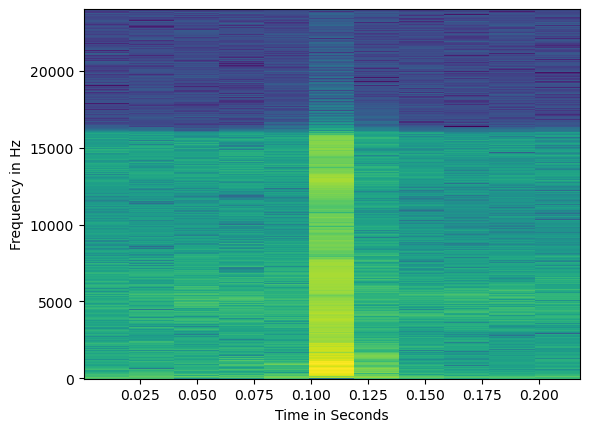

In [124]:
# Example for plotting a spectrogram using this function
import audiosegment
import matplotlib.pyplot as plt
#...
seg = audiosegment.from_file("2_1.m4a")
freqs, times, amplitudes = seg.spectrogram(window_length_s=0.02, overlap=0.01)
amplitudes = 10 * np.log10(amplitudes + 1e-9)
# Plot
plt.pcolormesh(times, freqs, amplitudes)
plt.xlabel("Time in Seconds")
plt.ylabel("Frequency in Hz")
plt.show()

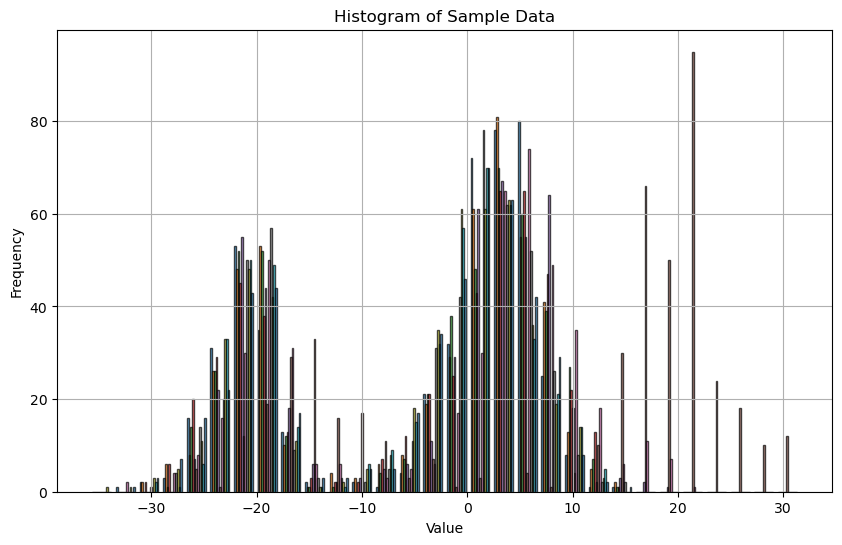

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
data = amplitudes  # 1000 random numbers from a normal distribution

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data')

# Show plot
plt.grid(True)
plt.show()


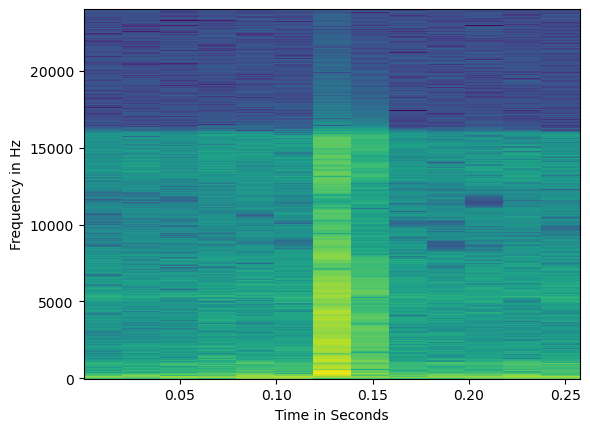

In [113]:
# Example for plotting a spectrogram using this function
import audiosegment
import matplotlib.pyplot as plt
#...
seg = audiosegment.from_file("13_2.m4a")
freqs, times, amplitudes = seg.spectrogram(window_length_s=0.02, overlap=0.01)
amplitudes = 10 * np.log10(amplitudes + 1e-7)
# Plot
plt.pcolormesh(times, freqs, amplitudes)
plt.xlabel("Time in Seconds")
plt.ylabel("Frequency in Hz")
plt.show()

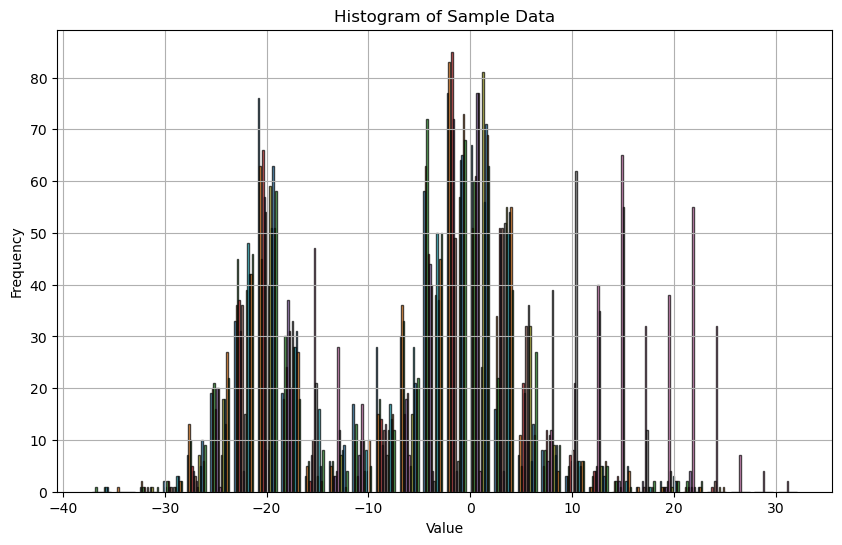

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
data = amplitudes  # 1000 random numbers from a normal distribution

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data')

# Show plot
plt.grid(True)
plt.show()


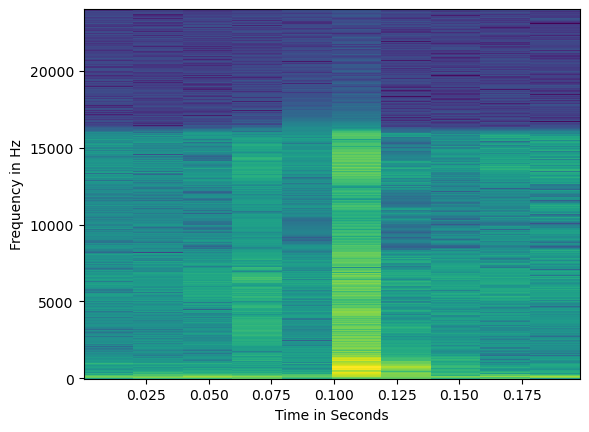

In [116]:
# Example for plotting a spectrogram using this function
import audiosegment
import matplotlib.pyplot as plt
#...
seg = audiosegment.from_file("14_1.m4a")
freqs, times, amplitudes = seg.spectrogram(window_length_s=0.02, overlap=0.01)
amplitudes = 2595 * np.log10(amplitudes + 1e-9)
# Plot
plt.pcolormesh(times, freqs, amplitudes)
plt.xlabel("Time in Seconds")
plt.ylabel("Frequency in Hz")
plt.show()

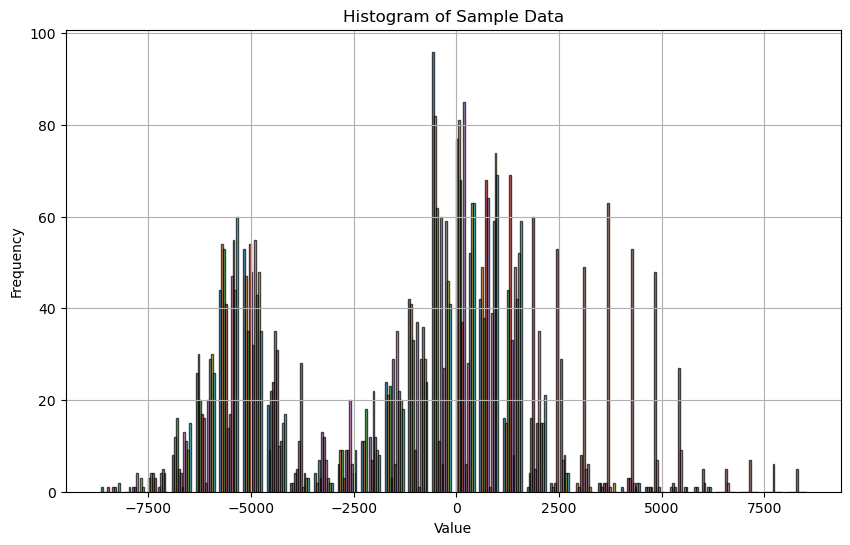

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
data = amplitudes  # 1000 random numbers from a normal distribution

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data')

# Show plot
plt.grid(True)
plt.show()


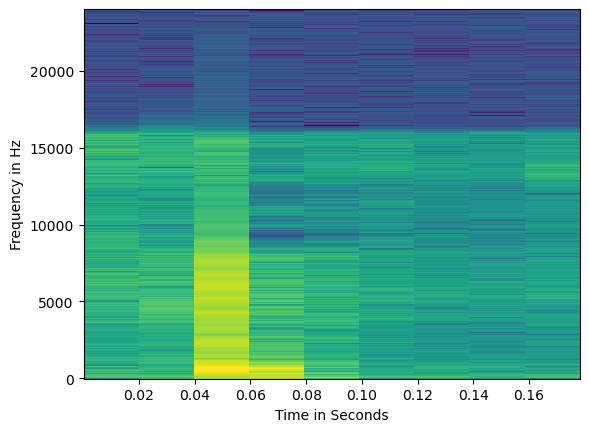

In [90]:
# Example for plotting a spectrogram using this function
import audiosegment
import matplotlib.pyplot as plt
#...
seg = audiosegment.from_file("12_1.m4a")
freqs, times, amplitudes = seg.spectrogram(window_length_s=0.02, overlap=0.01)
amplitudes = 10 * np.log10(amplitudes + 1e-9)
# Plot
plt.pcolormesh(times, freqs, amplitudes)
plt.xlabel("Time in Seconds")
plt.ylabel("Frequency in Hz")
plt.show()

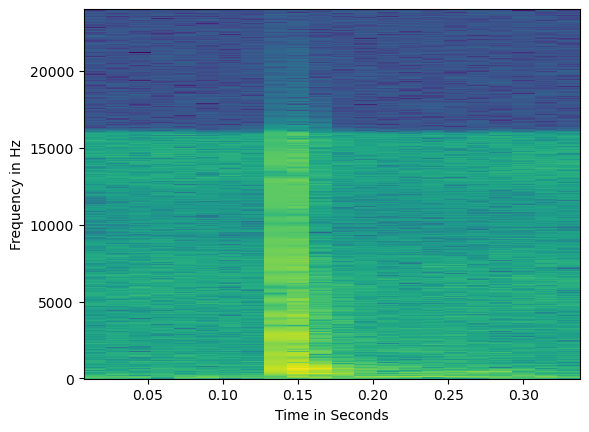

In [35]:
# Example for plotting a spectrogram using this function
import audiosegment
import matplotlib.pyplot as plt
#...
seg = audiosegment.from_file("31_1.m4a")
freqs, times, amplitudes = seg.spectrogram(window_length_s=0.03, overlap=0.5)
amplitudes = 10 * np.log10(amplitudes + 1e-9)
# Plot
plt.pcolormesh(times, freqs, amplitudes)
plt.xlabel("Time in Seconds")
plt.ylabel("Frequency in Hz")
plt.show()

Create PNG files containing spectrograms from all the WAV files in the "Sounds/background" directory.

In [38]:
import numpy as np
import librosa.display
import os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure(figsize=(10, 4))  # Adjust figure size if needed
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sampling rate
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    
    # Display the spectrogram
    librosa.display.specshow(log_ms, sr=sr, ax=ax, cmap='magma')
    
    # Save the figure
    fig.savefig(image_file, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    # Ensure the output path exists
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # List all files in the input directory
    files = os.listdir(input_path)

    # Process each file
    for i, file in enumerate(files):
        if file.endswith('.m4a'):  # Check file extension
            input_file = os.path.join(input_path, file)
            output_file = os.path.join(output_path, file.replace('.m4a', '.png'))
            create_spectrogram(input_file, output_file)
            print(f"Processed {i + 1}/{len(files)}: {file} -> {output_file}")

# Example usage:
# create_pngs_from_wavs('Sounds/background', 'Spectrograms/background')


In [108]:
y, sr = librosa.load('1_1.m4a', sr=None)  # sr=None to preserve the original sampling rate


C:\Users\Admin\AppData\Local\Temp\ipykernel_21724\3796644733.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('1_1.m4a', sr=None)  # sr=None to preserve the original sampling rate


In [111]:
max(y)

0.86727905

In [112]:
min(y)

-0.832428

C:\Users\Admin\AppData\Local\Temp\ipykernel_21724\4236001517.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sample rate


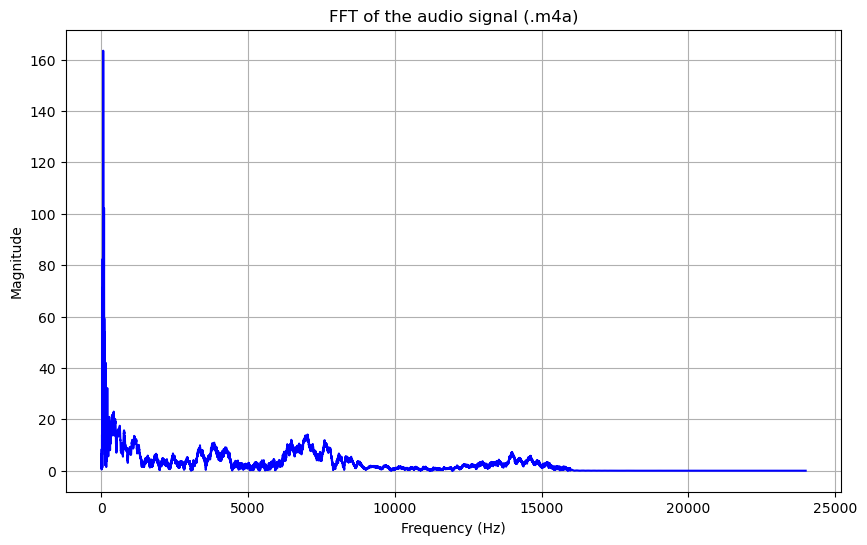

In [65]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def plot_fft(audio_file):
    # Load the .m4a audio file
    y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sample rate

    # Perform FFT on the signal
    n = len(y)  # Number of samples in the signal
    fft_values = np.fft.fft(y)  # Compute the FFT
    fft_magnitude = np.abs(fft_values)  # Magnitude of the FFT

    # Create frequency bins
    freqs = np.fft.fftfreq(n, 1/sr)

    # Only keep the positive half of the spectrum
    positive_freqs = freqs[:n // 2]
    positive_magnitude = fft_magnitude[:n // 2]

    # Plot the frequency spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(positive_freqs, positive_magnitude, color='b')
    plt.title('FFT of the audio signal (.m4a)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

# Example usage:
plot_fft('1_1.m4a')


C:\Users\Admin\AppData\Local\Temp\ipykernel_21724\2178849761.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('1_1.m4a')


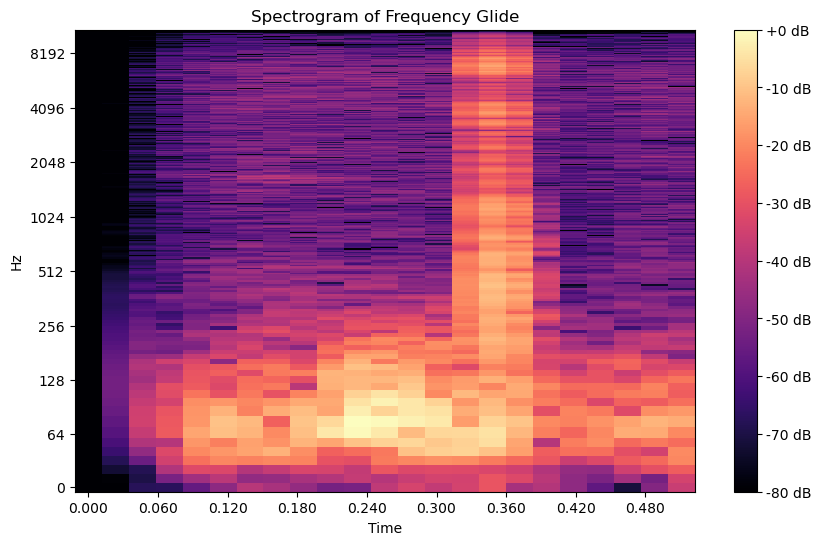

In [85]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the .m4a file
y, sr = librosa.load('1_1.m4a')

# Generate the spectrogram
plt.figure(figsize=(10, 6))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Frequency Glide')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_21724\1929845662.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('22_1.m4a')


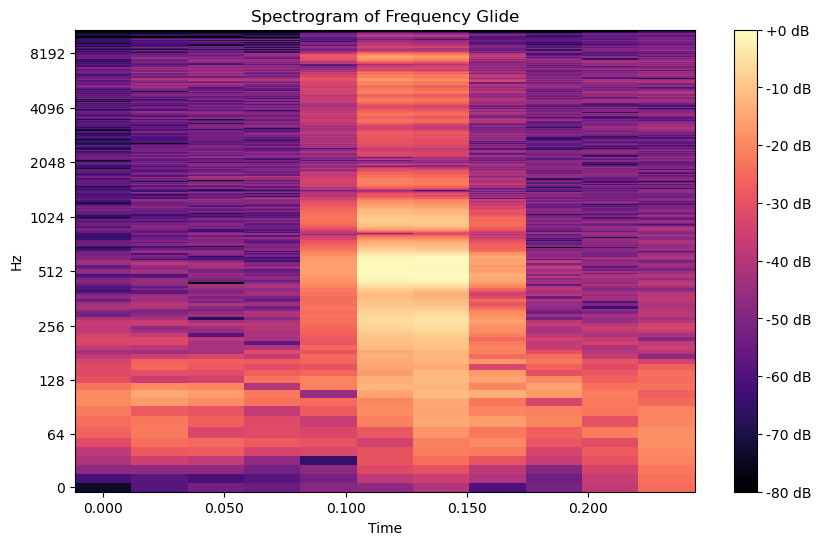

In [86]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the .m4a file
y, sr = librosa.load('22_1.m4a')

# Generate the spectrogram
plt.figure(figsize=(10, 6))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Frequency Glide')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_21724\3405699950.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sample rate


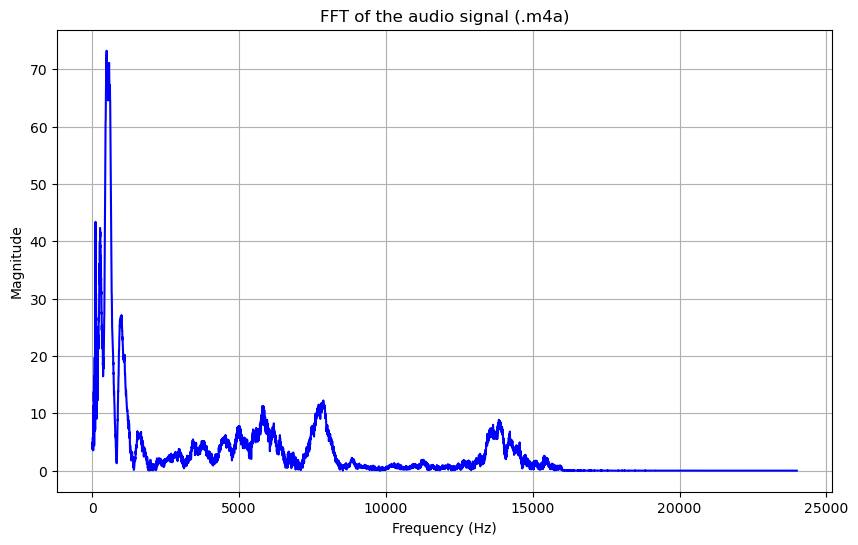

In [64]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def plot_fft(audio_file):
    # Load the .m4a audio file
    y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sample rate

    # Perform FFT on the signal
    n = len(y)  # Number of samples in the signal
    fft_values = np.fft.fft(y)  # Compute the FFT
    fft_magnitude = np.abs(fft_values)  # Magnitude of the FFT

    # Create frequency bins
    freqs = np.fft.fftfreq(n, 1/sr)

    # Only keep the positive half of the spectrum
    positive_freqs = freqs[:n // 2]
    positive_magnitude = fft_magnitude[:n // 2]

    # Plot the frequency spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(positive_freqs, positive_magnitude, color='b')
    plt.title('FFT of the audio signal (.m4a)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

# Example usage:
plot_fft('22_1.m4a')


###### import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_stft(audio_file):
    # Load the .m4a audio file
    y, sr = librosa.load(audio_file, sr=None)  # sr=None to keep original sample rate

    # Compute the STFT
    stft_values = librosa.stft(y, n_fft=1024, hop_length=512)  # You can adjust n_fft and hop_length
    stft_magnitude = np.abs(stft_values)  # Magnitude of the STFT

    # Convert magnitude to decibel scale
    log_stft = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(log_stft, sr=sr, x_axis='time', y_axis='log', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT Spectrogram of the audio signal (.m4a)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Example usage:
plot_stft('22_2.m4a')


In [68]:
y, sr = librosa.load('1_1_02.m4a', sr=None)  # sr=None to keep original sample rate
sr

C:\Users\Admin\AppData\Local\Temp\ipykernel_21724\1679818289.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('1_1_02.m4a', sr=None)  # sr=None to keep original sample rate


48000

C:\Users\Admin\AppData\Local\Temp\ipykernel_21724\520408954.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)  # sr=None to keep original sample rate


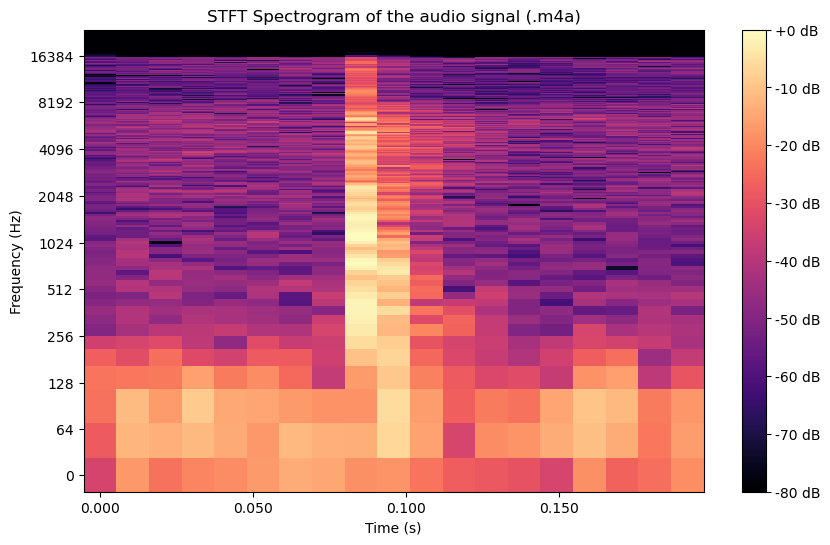

In [72]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_stft(audio_file):
    # Load the .m4a audio file
    y, sr = librosa.load(audio_file, sr=None)  # sr=None to keep original sample rate

    # Compute the STFT
    stft_values = librosa.stft(y, n_fft=1024, hop_length=512)  # You can adjust n_fft and hop_length
    stft_magnitude = np.abs(stft_values)  # Magnitude of the STFT

    # Convert magnitude to decibel scale
    log_stft = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(log_stft, sr=sr, x_axis='time', y_axis='log', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT Spectrogram of the audio signal (.m4a)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Example usage:
plot_stft('1_1_02.m4a')


In [80]:
create_pngs_from_wavs('Sounds/background', 'Spectrograms/background')

C:\Users\Admin\AppData\Local\Temp\ipykernel_21724\4078321627.py:13: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sampling rate


Processed 1/9: 12_1.m4a -> Spectrograms/background\12_1.png
Processed 2/9: 12_1_02.m4a -> Spectrograms/background\12_1_02.png
Processed 3/9: 12_2.m4a -> Spectrograms/background\12_2.png
Processed 4/9: 1_1.m4a -> Spectrograms/background\1_1.png
Processed 5/9: 1_1_02.m4a -> Spectrograms/background\1_1_02.png
Processed 6/9: 1_2.m4a -> Spectrograms/background\1_2.png
Processed 7/9: 22_1.m4a -> Spectrograms/background\22_1.png
Processed 8/9: 22_2.m4a -> Spectrograms/background\22_2.png
Processed 9/9: 31_1.m4a -> Spectrograms/background\31_1.png


Create PNG files containing spectrograms from all the WAV files in the "Sounds/chainsaw" directory.

In [3]:
create_pngs_from_wavs('Sounds/chainsaw', 'Spectrograms/chainsaw')

Create PNG files containing spectrograms from all the WAV files in the "Sounds/engine" directory.

In [4]:
create_pngs_from_wavs('Sounds/engine', 'Spectrograms/engine')

Create PNG files containing spectrograms from all the WAV files in the "Sounds/storm" directory.

In [5]:
create_pngs_from_wavs('Sounds/storm', 'Spectrograms/storm')

Define two new helper functions for loading and displaying spectrograms and declare two Python lists — one to store spectrogram images, and another to store class labels.

In [5]:
from keras.preprocessing import image
import librosa.display, os


def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

In [7]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

    

Load the background spectrogram images, add them to the list named `x`, and label them with 0s.

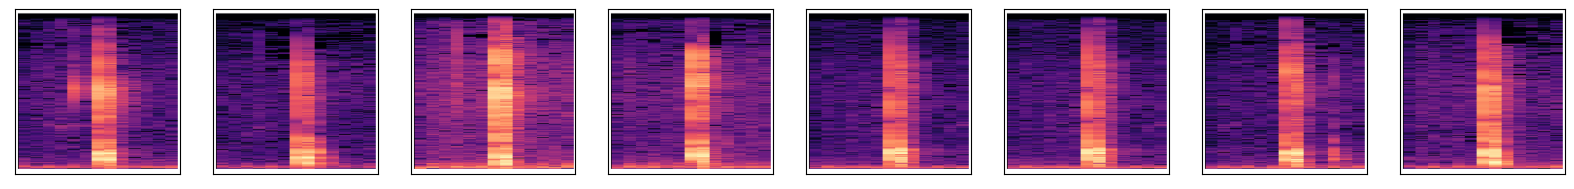

In [8]:
images, labels = load_images_from_path('Spectrograms/MidRipe', 0)
show_images(images)
    
x += images
y += labels

Load the chainsaw spectrogram images, add them to the list named `x`, and label them with 1s.

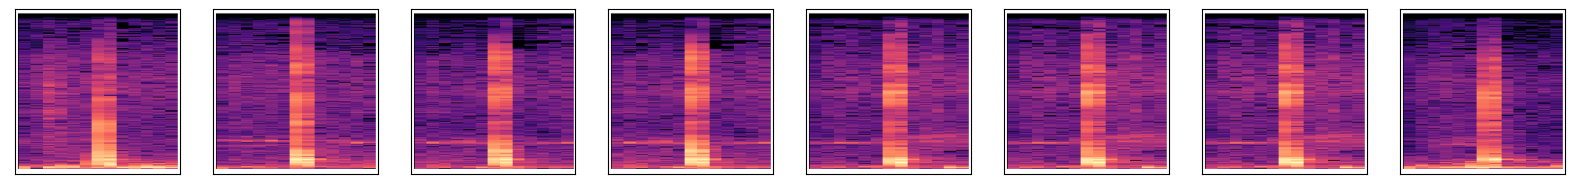

In [11]:
images, labels = load_images_from_path('Spectrograms/Ripe', 1)
show_images(images)
    
x += images
y += labels

Load the engine spectrogram images, add them to the list named `x`, and label them with 2s.

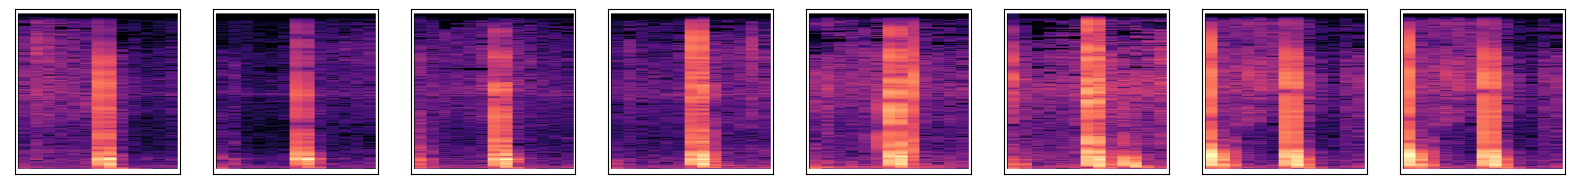

In [12]:
images, labels = load_images_from_path('Spectrograms/Unripe', 2)
show_images(images)
    
x += images
y += labels

Load the storm spectrogram images, add them to the list named `x`, and label them with 3s.

Split the images and labels into two datasets — one for training, and one for testing. Then divide the pixel values by 255 and one-hot-encode the labels using Keras's [to_categorical](https://keras.io/api/utils/python_utils/#to_categorical-function) function.

In [15]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Build and train a CNN

State-of-the-art image classification typically isn't done with traditional neural networks. Rather, it is performed with convolutional neural networks that use [convolution layers](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/) to extract features from images and [pooling layers](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/) to downsize images so features can be detected at various resolutions. The next task is to build a CNN containing a series of convolution and pooling layers for feature extraction, a pair of fully connected layers for classification, and a `softmax` layer that outputs probabilities for each class, and to train it with spectrogram images and labels. Start by defining the CNN.

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,212,548 (73.29 MB)

 Trainable params: 19,212,548 (73.29 MB)

 Non-trainable params: 0 (0.00 B)

Train the CNN and save the `history` object returned by `fit` in a local variable.

In [17]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 3), output.shape=(None, 4)

Plot the training and validation accuracy.

[]

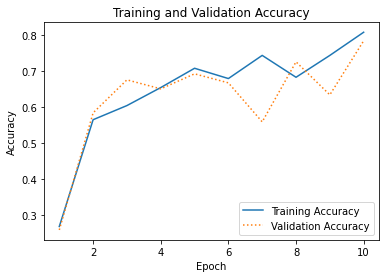

In [14]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

The accuracy is decent given that the network was trained with just 280 images, but it might be possible to achieve higher accuracy by employing transfer learning.

## Use transfer learning to improve accuracy

[Transfer learning](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a) is a powerful technique that allows sophisticated CNNs trained by Google, Microsoft, and others on GPUs to be repurposed and used to solve domain-specific problems. Many pretrained CNNs are available in the public domain, and several are included with Keras. Let's use [`MobileNetV2`](https://keras.io/api/applications/mobilenet/), a pretrained CNN from Google that is optimized for mobile devices, to extract features from spectrogram images.

> `MobileNetV2` requires less processing power and has a smaller memory footprint than CNNs such as `ResNet50V2`. That's why it is ideal for mobile devices. You can learn more about it in the [Google AI blog](https://ai.googleblog.com/2018/04/mobilenetv2-next-generation-of-on.html).

Start by calling Keras's [MobileNetV2](https://keras.io/api/applications/mobilenet/) function to instantiate `MobileNetV2` without the classification layers. Use the [preprocess_input](https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet/preprocess_input) function for `MobileNet` networks to preprocess the training and testing images. Then run both datasets through `MobileNetV2` to extract features.

In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

Define a neural network to classify features extracted by `MobileNetV2`.

In [16]:
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the network with features extracted by `MobileNetV2`.

In [17]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
28/28 [==============================] - 4s 131ms/step - loss: 31.6268 - accuracy: 0.5466 - val_loss: 3.7857 - val_accuracy: 0.8583
Epoch 2/10
28/28 [==============================] - 4s 125ms/step - loss: 1.6843 - accuracy: 0.9399 - val_loss: 2.0175 - val_accuracy: 0.9250
Epoch 3/10
28/28 [==============================] - 4s 125ms/step - loss: 0.3810 - accuracy: 0.9782 - val_loss: 8.0027 - val_accuracy: 0.8417
Epoch 4/10
28/28 [==============================] - 4s 126ms/step - loss: 1.9832 - accuracy: 0.9639 - val_loss: 7.5654 - val_accuracy: 0.8333
Epoch 5/10
28/28 [==============================] - 3s 125ms/step - loss: 1.9648 - accuracy: 0.9188 - val_loss: 1.5344 - val_accuracy: 0.9500
Epoch 6/10
28/28 [==============================] - 4s 125ms/step - loss: 0.3354 - accuracy: 0.9938 - val_loss: 2.0490 - val_accuracy: 0.9250
Epoch 7/10
28/28 [==============================] - 4s 125ms/step - loss: 0.3852 - accuracy: 0.9846 - val_loss: 1.5639 - val_accuracy: 0.9583
Epoch

Plot the training and validation accuracy.

[]

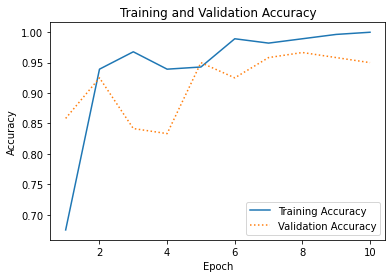

In [18]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Run the test images through the network and use a confusion matrix to assess the results.

Text(89.18, 0.5, 'Actual label')

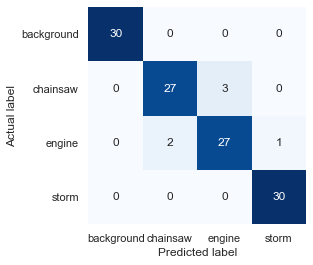

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['background', 'chainsaw', 'engine', 'storm']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

The network is pretty adept at identifying clips that don't contain the sounds of chainsaw or engines. It sometimes confuses chainsaw sounds and engine sounds, but that's OK, because the presence of either might indicate illicit activity in a rain forest.

## Test with unrelated WAV files

The "Sounds" directory has a subdirectory named "samples" containing WAV files that the CNN was neither trained nor tested with. The WAV files bear no relation to the samples used for training and testing; they were extracted from a YouTube video documenting Brazil's efforts to curb illegal logging. Let's use the model trained in the previous exercise to analyze these files for sounds of logging activity. Start by creating a spectrogram from the first sample WAV file, which contains audio of loggers cutting down trees in the Amazon.

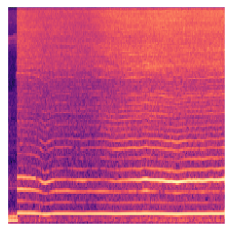

In [20]:
create_spectrogram('Sounds/samples/sample1.wav', 'Spectrograms/sample1.png')

x = image.load_img('Spectrograms/sample1.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

Preprocess the spectrogram image, pass it to `MobileNetV2` for feature extraction, and classify the features.

In [21]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

background: 0.0
chainsaw: 1.0
engine: 5.189781730147105e-35
storm: 0.0


Create a spectrogram from a WAV file that includes the sounds of a logging truck rumbling through the rain forest.

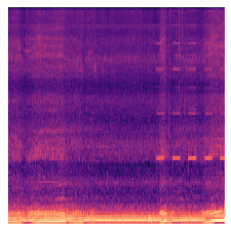

In [22]:
create_spectrogram('Sounds/samples/sample2.wav', 'Spectrograms/sample2.png')

x = image.load_img('Spectrograms/sample2.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

Preprocess the spectrogram image, pass it to `MobileNetV2` for feature extraction, and classify the features.

In [23]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

background: 0.0
chainsaw: 1.2086960212255175e-20
engine: 1.0
storm: 0.0


If the network got either of the samples wrong, try training it again with the output from `MobileNetV2`. Remember that a neural network will train differently every time, in part because Keras initializes the weights and biases with small random values. In the real world, data scientists often train a neural network 20 or more times and average the results to quantify its accuracy.